https://www.kaggle.com/arthurtok/sql-and-python-primer-bokeh-plotly/notebook

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sqlite3
import os

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

Loading BokehJS ...

In [2]:
conn = sqlite3.connect('../input/database.sqlite')
conn

In [3]:
c = conn.cursor()
c

In [4]:
for row in c.execute("SELECT * FROM Country LIMIT 2"):
    print(row)


('AFG', 'Afghanistan', 'Afghanistan', 'Islamic State of Afghanistan', 'AF', 'Afghan afghani', 'Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.', 'South Asia', 'Low income', 'AF', '2002/03', '', 'Value added at basic prices (VAB)', 'IDA', 'HIPC', 'Country uses the 1993 System of National Accounts methodology.', '', '', '', 'Actual', 'General trade system', 'Consolidated central government', 'General Data Dissemination System (GDDS)', '1979', 'Multiple Indicator Cluster Survey (MICS), 2010/11', 'Integrated household survey (IHS), 2008', '', '2013/14', '', 2013, 2000)
('ALB', 'Albania', 'Albania', 'Republic of Albania', 'AL', 'Albanian lek', '', 'Europe & Central Asia', 'Upper middle income', 'AL', 'Original chained constant price data are rescaled.', '1996', 'Value added at basic prices (VAB)', 'I

In [5]:
Country = pd.read_sql("SELECT * FROM Country", con=conn)
Country.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",,,2010,2013,2001
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,,East Asia & Pacific,Upper middle income,AS,...,,,2010,,,Yes,2007,,,
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,,Europe & Central Asia,High income: nonOECD,AD,...,,,2011. Population data compiled from administra...,,,Yes,,,2006,


In [6]:
pd.read_sql("SELECT * FROM Country LIMIT 3", con=conn)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",,,2010,2013,2001


In [7]:
Country[Country['CountryCode']=="AFG"]

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000


In [8]:
pd.read_sql("SELECT * FROM Country WHERE CountryCode == 'AFG' ",
            con=conn)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000


In [9]:
pd.read_sql("""SELECT Region, COUNT(*) AS [Count] 
FROM Country 
GROUP BY Region
ORDER BY 2 DESC
""", con=conn)

,Region,Count
0,Europe & Central Asia,57
1,Sub-Saharan Africa,48
2,Latin America & Caribbean,41
3,East Asia & Pacific,36
4,,33
5,Middle East & North Africa,21
6,South Asia,8
7,North America,3


In [10]:
pd.read_sql("""
SELECT A.CountryCode
    ,B.LatestPopulationCensus
    ,B.SourceOfMostRecentIncomeAndExpenditureData
    ,B.ShortName
FROM (
    -- First subquery (i.e the Left table)
    SELECT CountryCode
        ,LatestPopulationCensus
        , SourceOfMostRecentIncomeAndExpenditureData
        , ShortName
    FROM Country
    WHERE CountryCode IN ('AFG', 'ALB', 'ASM', 'BEL')
    ) AS A
LEFT JOIN (
    -- Second subquery (i.e the right table)
    SELECT CountryCode
        , LatestPopulationCensus
        , SourceOfMostRecentIncomeAndExpenditureData
        , ShortName
    FROM Country AS A
    WHERE CountryCode IN ('AFG', 'ARM', 'URY', 'BEL')
    ) AS B
ON A.CountryCode = B.CountryCode
""", con=conn)

,CountryCode,LatestPopulationCensus,SourceOfMostRecentIncomeAndExpenditureData,ShortName
0,AFG,1979,"Integrated household survey (IHS), 2008",Afghanistan
1,ALB,None,None,None
2,ASM,None,None,None
3,BEL,2011,"Integrated household survey (IHS), 2000",Belgium


In [11]:
pd.read_sql("""
SELECT CountryCode
    , LatestPopulationCensus
    , SourceOfMostRecentIncomeAndExpenditureData
    , ShortName
    FROM Country
    WHERE CountryCode IN ('AFG', 'ALB', 'ASM', 'BEL')
    """, con=conn)

,CountryCode,LatestPopulationCensus,SourceOfMostRecentIncomeAndExpenditureData,ShortName
0,AFG,1979,"Integrated household survey (IHS), 2008",Afghanistan
1,ALB,2011,Living Standards Measurement Study Survey (LSM...,Albania
2,ASM,2010,,American Samoa
3,BEL,2011,"Integrated household survey (IHS), 2000",Belgium


In [12]:
pd.read_sql("""
SELECT CountryCode
    , LatestPopulationCensus
    , SourceOfMostRecentIncomeAndExpenditureData
    , ShortName
    FROM Country
    WHERE CountryCode IN ('AFG', 'ARM', 'URY', 'BEL')
    """, con=conn)

,CountryCode,LatestPopulationCensus,SourceOfMostRecentIncomeAndExpenditureData,ShortName
0,AFG,1979,"Integrated household survey (IHS), 2008",Afghanistan
1,ARM,2011,"Integrated household survey (IHS), 2012",Armenia
2,BEL,2011,"Integrated household survey (IHS), 2000",Belgium
3,URY,2011,"Integrated household survey (IHS), 2013",Uruguay


In [13]:
pd.read_sql("""
SELECT CountryCode
    , LatestPopulationCensus
    , SourceOfMostRecentIncomeAndExpenditureData
    , ShortName
FROM Country
WHERE CountryCode IN ('AFG', 'ALB', 'ASM', 'BEL')

UNION

SELECT CountryCode
    , LatestPopulationCensus
    , SourceOfMostRecentIncomeAndExpenditureData
    , ShortName
FROM Country
WHERE CountryCode IN ('AFG', 'ARM', 'URY', 'BEL')

    """, con=conn)

,CountryCode,LatestPopulationCensus,SourceOfMostRecentIncomeAndExpenditureData,ShortName
0,AFG,1979,"Integrated household survey (IHS), 2008",Afghanistan
1,ALB,2011,Living Standards Measurement Study Survey (LSM...,Albania
2,ARM,2011,"Integrated household survey (IHS), 2012",Armenia
3,ASM,2010,,American Samoa
4,BEL,2011,"Integrated household survey (IHS), 2000",Belgium
5,URY,2011,"Integrated household survey (IHS), 2013",Uruguay


In [14]:
pd.read_sql("""
SELECT CountryCode
    , LatestPopulationCensus
    , SourceOfMostRecentIncomeAndExpenditureData
    , ShortName
FROM Country
WHERE CountryCode IN ('AFG', 'ALB', 'ASM', 'BEL')

INTERSECT

SELECT CountryCode
    , LatestPopulationCensus
    , SourceOfMostRecentIncomeAndExpenditureData
    , ShortName
FROM Country
WHERE CountryCode IN ('AFG', 'ARM', 'URY', 'BEL')

    """, con=conn)

,CountryCode,LatestPopulationCensus,SourceOfMostRecentIncomeAndExpenditureData,ShortName
0,AFG,1979,"Integrated household survey (IHS), 2008",Afghanistan
1,BEL,2011,"Integrated household survey (IHS), 2000",Belgium


In [15]:
pd.read_sql("""
SELECT CountryCode
    , LatestPopulationCensus
    , SourceOfMostRecentIncomeAndExpenditureData
    , ShortName
FROM Country
WHERE CountryCode IN ('AFG', 'ALB', 'ASM', 'BEL')

EXCEPT

SELECT CountryCode
    , LatestPopulationCensus
    , SourceOfMostRecentIncomeAndExpenditureData
    , ShortName
FROM Country
WHERE CountryCode IN ('AFG', 'ARM', 'URY', 'BEL')

    """, con=conn)

,CountryCode,LatestPopulationCensus,SourceOfMostRecentIncomeAndExpenditureData,ShortName
0,ALB,2011,Living Standards Measurement Study Survey (LSM...,Albania
1,ASM,2010,,American Samoa


In [16]:
Indicators = pd.read_sql("""
SELECT *
FROM Indicators
WHERE IndicatorCode IN
    ('AG.LND.PRCP.MM',
    'AG.LND.FRST.K2',
    'EG.ELC.ACCS.ZS',
    'EG.ELC.FOSL.ZS',
    'EN.POP.DNST',
    'SG.VAW.REAS.ZS',
    'SM.POP.NETM',
    'SP.POP.65UP.TO.ZS',
    'FI.RES.TOTL.DT.ZS', 
    'GC.DOD.TOTL.GD.ZS',
    'MS.MIL.XPND.GD.ZS',
    'SI.POV.GINI',
    'IP.JRN.ARTC.SC',
    'SE.ADT.1524.LT.ZS'
    )
""", con=conn)
print(Indicators.shape)
Indicators.head()

(62211, 6)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,Forest area (sq. km),AG.LND.FRST.K2,1990,959062.8
1,Caribbean small states,CSS,Forest area (sq. km),AG.LND.FRST.K2,1990,328330.5
2,Central Europe and the Baltics,CEB,Forest area (sq. km),AG.LND.FRST.K2,1990,351770.0
3,East Asia & Pacific (all income levels),EAS,Forest area (sq. km),AG.LND.FRST.K2,1990,6550932.2
4,East Asia & Pacific (developing only),EAP,Forest area (sq. km),AG.LND.FRST.K2,1990,4601840.4


In [17]:
gini = Indicators[Indicators['IndicatorCode']=='SI.POV.GINI']
print(gini.shape)
gini.head()

(1255, 6)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
46045,Australia,AUS,GINI index (World Bank estimate),SI.POV.GINI,1981,31.33
46046,Brazil,BRA,GINI index (World Bank estimate),SI.POV.GINI,1981,57.93
46047,Canada,CAN,GINI index (World Bank estimate),SI.POV.GINI,1981,32.60
46048,China,CHN,GINI index (World Bank estimate),SI.POV.GINI,1981,29.11
46049,Costa Rica,CRI,GINI index (World Bank estimate),SI.POV.GINI,1981,47.49


In [18]:
gini.CountryCode.unique()

array(['AUS', 'BRA', 'CAN', 'CHN', 'CRI', 'ETH', 'THA', 'URY', 'VEN',
       'BGD', 'IND', 'IDN', 'MYS', 'MEX', 'MAR', 'NPL', 'RWA', 'BWA',
       'CIV', 'NGA', 'PER', 'PHL', 'POL', 'LKA', 'TUN', 'ARG', 'DOM',
       'GTM', 'HND', 'IRN', 'ISR', 'JOR', 'LSO', 'USA', 'CHL', 'ECU',
       'GHA', 'HUN', 'MRT', 'PAK', 'SVN', 'TUR', 'BLR', 'COL', 'HRV',
       'CZE', 'EST', 'JAM', 'KAZ', 'KGZ', 'LVA', 'LTU', 'MDA', 'RUS',
       'SVK', 'TTO', 'TKM', 'UKR', 'UZB', 'BGR', 'PAN', 'ROM', 'UGA',
       'BOL', 'PRY', 'SLV', 'GIN', 'SEN', 'TZA', 'ZMB', 'BDI', 'CAF',
       'KEN', 'LAO', 'NER', 'VNM', 'BLZ', 'GNB', 'MDG', 'NIC', 'ZAF',
       'BFA', 'KHM', 'MLI', 'SWZ', 'DZA', 'AZE', 'MNG', 'LCA', 'ALB',
       'ARM', 'CMR', 'GEO', 'MOZ', 'PNG', 'MWI', 'GMB', 'GUY', 'MKD',
       'MDV', 'SYC', 'SUR', 'TJK', 'AGO', 'FSM', 'STP', 'BIH', 'CPV',
       'HTI', 'TMP', 'DJI', 'FJI', 'SRB', 'BEN', 'BTN', 'TCD', 'KSV',
       'NAM', 'SLE', 'AUT', 'BEL', 'COM', 'ZAR', 'CYP', 'DNK', 'FIN',
       'FRA', 'GRC',

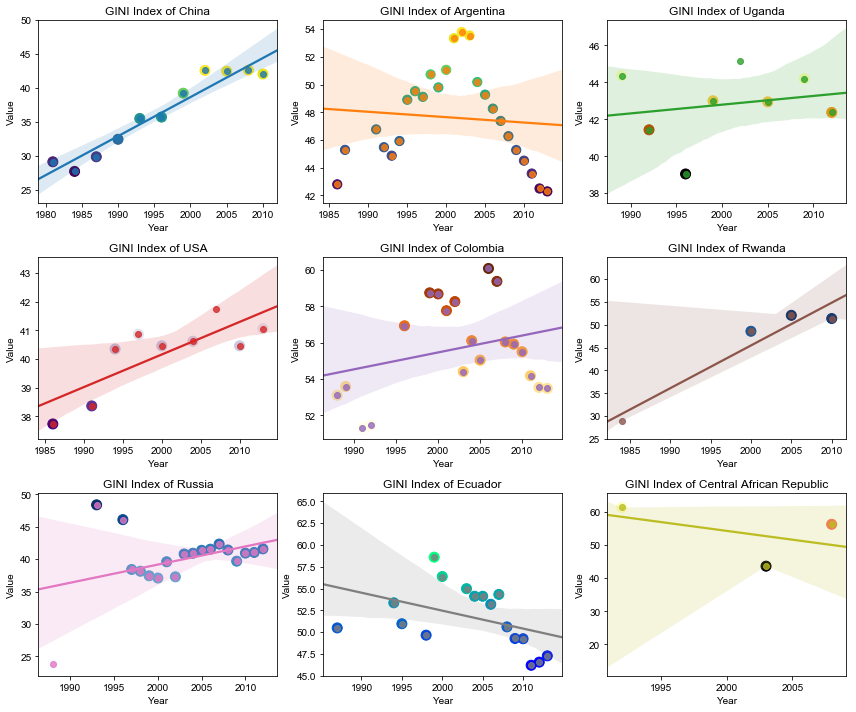

In [19]:
f, ((ax1, ax2, ax3), (ax4,ax5,ax6), (ax7, ax8, ax9)) = plt.subplots(3,3,
                                                                    figsize=(12,10))
points = ax1.scatter(gini[gini['CountryCode'] == 'CHN']["Year"],
                     gini[gini['CountryCode'] == 'CHN']["Value"],
                     c=gini[gini['CountryCode'] == 'CHN']["Value"], 
                     s=100, cmap="viridis")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'CHN'], 
            ax=ax1)
ax1.set_title("GINI Index of China")

# Plot of GINI of Argentina
points = ax2.scatter(gini[gini['CountryCode'] == 'ARG']["Year"],
                     gini[gini['CountryCode'] == 'ARG']["Value"],
                     c=gini[gini['CountryCode'] == 'ARG']["Value"],
                     s=85, cmap="viridis")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'ARG'],
            ax=ax2)
ax2.set_title("GINI Index of Argentina")

points = ax3.scatter(gini[gini['CountryCode'] == 'UGA']["Year"], 
                     gini[gini['CountryCode'] == 'UGA']["Value"],
                     c=gini[gini['CountryCode'] == 'UGA']["Value"], 
                     s=100, cmap="afmhot")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'UGA'],
            ax=ax3)
ax3.set_title("GINI Index of Uganda")

points = ax4.scatter(gini[gini['CountryCode'] == 'USA']["Year"],
                     gini[gini['CountryCode'] == 'USA']["Value"],
                     c=gini[gini['CountryCode'] == 'USA']["Value"],
                     s=100, cmap="Purples_r")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'USA'],
            ax=ax4)
ax4.set_title("GINI Index of USA")

points = ax5.scatter(gini[gini['CountryCode'] == 'COL']["Year"], 
                     gini[gini['CountryCode'] == 'COL']["Value"],
                     c=gini[gini['CountryCode'] == 'COL']["Value"],
                     s=100, cmap="YlOrBr")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'COL'], 
            ax=ax5)
ax5.set_title("GINI Index of Colombia")

points = ax6.scatter(gini[gini['CountryCode'] == 'RWA']["Year"],
                     gini[gini['CountryCode'] == 'RWA']["Value"],
                     c=gini[gini['CountryCode'] == 'RWA']["Value"],
                     s=100, cmap="Blues")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'RWA'], 
            ax=ax6)
ax6.set_title("GINI Index of Rwanda")

points = ax7.scatter(gini[gini['CountryCode'] == 'RUS']["Year"],
                     gini[gini['CountryCode'] == 'RUS']["Value"],
                     c=gini[gini['CountryCode'] == 'RUS']["Value"], 
                     s=100, cmap="Blues")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'RUS'],
            ax=ax7)
ax7.set_title("GINI Index of Russia")

points = ax8.scatter(gini[gini['CountryCode'] == 'ECU']["Year"], 
                     gini[gini['CountryCode'] == 'ECU']["Value"],
                     c=gini[gini['CountryCode'] == 'ECU']["Value"],
                     s=100, cmap="winter")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'ECU'],
            ax=ax8)
ax8.set_title("GINI Index of Ecuador")

points = ax9.scatter(gini[gini['CountryCode'] == 'CAF']["Year"],
                     gini[gini['CountryCode'] == 'CAF']["Value"],
                     c=gini[gini['CountryCode'] == 'CAF']["Value"], 
                     s=100, cmap="magma")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'CAF'],
            ax=ax9)

ax9.set_title("GINI Index of Central African Republic")
sns.set_style(style="dark")
plt.tight_layout()




In [28]:
# Barplots of Youth literacy rates in 1990
data = Indicators[Indicators['IndicatorCode'] == 'SE.ADT.1524.LT.ZS'][Indicators['Year'] == 1990]
x, y = (list(x) for x in zip(*sorted(zip(data['Value'].values,
                                         data['CountryName'].values), 
                                     reverse = False)))

# Plotting using Plotly 
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Portland',
        reversescale = True
    ),
    name='Percentage of Youth Literacy Rate',
    orientation='h',
)

layout = dict(
    title='Barplot of Youth Literacy Rate in 1990',
     width = 680, height = 1500,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

# Barplot of Youth literacy rates in 2010
data = Indicators[Indicators['IndicatorCode'] == 'SE.ADT.1524.LT.ZS'][Indicators['Year'] == 2010]
x, y = (list(x) for x in zip(*sorted(zip(data['Value'].values, data['CountryName'].values), 
                                                            reverse = False)))

# Plotting using Plotly 
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Portland',
        reversescale = True
    ),
    name='Percentage of Youth Literacy Rate',
    orientation='h',
)

layout = dict(
    title='Barplot of Youth Literacy Rate in 2010',
     width = 680, height = 1500,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

In [29]:
# Create some useful helper variables
data = Indicators[Indicators['IndicatorCode'] == 'EG.ELC.ACCS.ZS']
data['Year'] = [str(x) for x in data['Year']]
years = list(data['Year'].unique())
country = [
     u'Jordan', u'Kazakhstan', u'Kenya', u'Kiribati',
       u'Korea, Dem. Rep.', u'Korea, Rep.', u'Kosovo', u'Kuwait',
       u'Kyrgyz Republic', u'Lao PDR', u'Latvia', u'Lebanon', u'Lesotho',
       u'Liberia', u'Libya', u'Liechtenstein', u'Lithuania', u'Luxembourg',
       u'Macao SAR, China', u'Macedonia, FYR', u'Madagascar', u'Malawi',
       u'Malaysia', u'Maldives', u'Mali', u'Malta', u'Marshall Islands',
       u'Mauritania', u'Mauritius', u'Mexico', u'Micronesia, Fed. Sts.',
       u'Moldova', u'Monaco', u'Mongolia', u'Montenegro', u'Morocco',
       u'Mozambique', u'Myanmar', u'Namibia', u'Nepal', u'Netherlands',
       u'New Caledonia', u'New Zealand', u'Nicaragua', u'Niger',
       u'Nigeria', u'Norway', u'Oman', u'Pakistan', u'Palau', u'Panama',
       u'Papua New Guinea', u'Paraguay', u'Peru', u'Philippines',
       u'Poland', u'Portugal', u'Puerto Rico', u'Qatar', u'Romania',
       u'Russian Federation', u'Rwanda', u'Samoa', u'San Marino',
       u'Sao Tome and Principe', u'Saudi Arabia', u'Senegal', u'Serbia',
       u'Seychelles', u'Sierra Leone', u'Singapore', u'Slovak Republic',
       u'Slovenia', u'Solomon Islands', u'Somalia', u'South Africa',
       u'South Sudan', u'Spain', u'Sri Lanka' u'Sudan', u'Suriname',
       u'Swaziland', u'Sweden', u'Switzerland', u'Syrian Arab Republic',
       u'Tajikistan', u'Tanzania', u'Thailand', u'Timor-Leste', u'Togo',
       u'Tonga', u'Trinidad and Tobago', u'Tunisia', u'Turkey',
       u'Turkmenistan', u'Tuvalu', u'Uganda',
       u'Ukraine', u'United Arab Emirates', u'United Kingdom',
       u'United States', u'Uruguay'
]

In [30]:
from math import pi

from bokeh.io import show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
# data = data.set_index('Year')
# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors)
# Set up the data for plotting. We will need to have values for every
# pair of year/month names. Map the rate to a color.
countr = []
year = []
color = []
rate = []
for y in years:
    for m in country:
        countr.append(m)
        year.append(y)
#         d[(d['x']>2) & (d['y']>7)]
        monthly_rate = data[(data['CountryName']==m) & (data['Year']==y)]['Value']
        rate.append(monthly_rate)

source = ColumnDataSource(
    data=dict(country=countr, year=year, rate=rate)
)

TOOLS = "hover,save,pan,box_zoom,wheel_zoom"

p = figure(title="Access to Electricity",
           x_range=years, y_range=list(reversed(country)),
           x_axis_location="above", plot_width=900, plot_height=900,
           tools=TOOLS)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="year", y="country", width=1, height=1,
       source=source,
       fill_color={'field': 'rate', 'transform': mapper},
       line_color=None)

p.select_one(HoverTool).tooltips = [
#     ('date', '@countr @year'),
    ('rate', '@rate'),
]

show(p)      # show the plot

In [31]:
data = Indicators[Indicators['IndicatorCode'] == 'SG.VAW.REAS.ZS']
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
45899,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REAS.ZS,1999,51.0
45900,Armenia,ARM,Women who believe a husband is justified in be...,SG.VAW.REAS.ZS,2000,32.3
45901,Ethiopia,ETH,Women who believe a husband is justified in be...,SG.VAW.REAS.ZS,2000,84.5
45902,Haiti,HTI,Women who believe a husband is justified in be...,SG.VAW.REAS.ZS,2000,39.9
45903,Malawi,MWI,Women who believe a husband is justified in be...,SG.VAW.REAS.ZS,2000,35.7


In [32]:
data = Indicators[Indicators['IndicatorCode'] == 'SE.ADT.1524.LT.ZS']
data['Year'] = [str(x) for x in data['Year']]
years = ['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']
country = ['Burkina Faso', 'Central African Republic', 'Kuwait', 'Turkey',
       'United Arab Emirates', 'Uruguay', 'Bolivia', 'Cameroon',
       'Egypt, Arab Rep.', 'Iran, Islamic Rep.', 'Mali', 'New Caledonia',
       'Swaziland', 'Tonga', 'Maldives', 'Poland', 'Rwanda', 'Afghanistan',
       'Benin', 'Burundi', 'Guinea-Bissau', 'Jordan', 'Vanuatu', 'Vietnam',
       'American Samoa', 'Argentina', 'Brazil', 'Comoros', 'Guam',
       'Hungary', 'Indonesia', 'Malaysia', 'Mexico', 'Mozambique', 'Palau',
       'Panama', 'Philippines', 'Puerto Rico', 'Singapore', 'South Africa',
       'Thailand', 'Trinidad and Tobago', 'Bahrain', 'Bangladesh',
       'Brunei Darussalam', 'Cuba', 'Dominican Republic', 'Greece',
       'India', 'Italy', 'Macao SAR, China', 'Nepal', 'Pakistan', 'Peru',
       'Portugal', 'Sao Tome and Principe', 'Spain', 'Sri Lanka',
       'Syrian Arab Republic', 'Venezuela, RB', 'Chile', 'China',
       'Ecuador', 'Haiti', 'Morocco', 'Paraguay', 'Zimbabwe', 'Israel',
       'Myanmar', 'Costa Rica', 'Liberia', 'Libya', 'Tunisia', 'Malta',
       'Qatar', 'Algeria', 'Malawi', 'Seychelles', "Cote d'Ivoire",
       'Senegal', 'Tanzania', 'Armenia', 'Belarus', 'Estonia',
       'Kazakhstan', 'Latvia', 'Lithuania', 'Moldova','Lesotho', 'Madagascar', 'Mauritania', 'Mongolia',
       'Papua New Guinea', 'Sudan', 'Togo', 'Uzbekistan', 'Albania',
       'Angola', 'Bulgaria', 'Congo, Dem. Rep.', 'Honduras', 'Nicaragua',
       'Niger', 'Ukraine', 'Eritrea', 'Georgia', 'Oman', 'Sierra Leone',
       'Suriname', 'Bhutan', 'Cayman Islands', 'Lebanon',
       'Korea, Dem. Rep.', 'South Sudan', 'Guyana', 'Timor-Leste',
       'Congo, Rep.', 'Montenegro', 'Serbia', 'Austria']

In [33]:
from math import pi

from bokeh.io import show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
# data = data.set_index('Year')
# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors)
# Set up the data for plotting. We will need to have values for every
# pair of year/month names. Map the rate to a color.
countr = []
year = []
color = []
rate = []
for y in years:
    for m in country:
        countr.append(m)
        year.append(y)
#         d[(d['x']>2) & (d['y']>7)]
        monthly_rate = data[(data['CountryName']==m) & (data['Year']==y)]['Value']
        rate.append(monthly_rate)

source = ColumnDataSource(
    data=dict(country=countr, year=year, rate=rate)
)

TOOLS = "hover,save,pan,box_zoom,wheel_zoom"

p = figure(title="Women who believe Husbands are justified in beating wifes",
           x_range=years, y_range=list(reversed(country)),
           x_axis_location="above", plot_width=900, plot_height=900,
           tools=TOOLS)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="year", y="country", width=1, height=1,
       source=source,
       fill_color={'field': 'rate', 'transform': mapper},
       line_color=None)

p.select_one(HoverTool).tooltips = [
#     ('date', '@countr @year'),
    ('rate', '@rate'),
]

show(p)      # show the plot